In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras import backend as K
#  to split the data of training and testing sets
( X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# conversion of class vectors to one hot vectors 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [3]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])

In [4]:
hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.3)
print("The model has successfully trained")

Epoch 1/10
329/329 [==============================] - 15s 42ms/step - loss: 0.3819 - accuracy: 0.8868 - val_loss: 0.1201 - val_accuracy: 0.9642
Epoch 2/10
329/329 [==============================] - 13s 40ms/step - loss: 0.1077 - accuracy: 0.9669 - val_loss: 0.0882 - val_accuracy: 0.9736
Epoch 3/10
329/329 [==============================] - 14s 42ms/step - loss: 0.0787 - accuracy: 0.9765 - val_loss: 0.0725 - val_accuracy: 0.9784
Epoch 4/10
329/329 [==============================] - 14s 42ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0594 - val_accuracy: 0.9819
Epoch 5/10
329/329 [==============================] - 14s 44ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0516 - val_accuracy: 0.9848
Epoch 6/10
329/329 [==============================] - 14s 43ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0498 - val_accuracy: 0.9848
Epoch 7/10
329/329 [==============================] - 14s 43ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0526 - val_accuracy:

In [5]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0323 - accuracy: 0.9892


[0.03230894356966019, 0.9891999959945679]

In [6]:
from keras.models import load_model
model.save("network.h5")
loaded_model = load_model("network.h5")
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print("LOSS: " + str(loss) + "\n" + "Accuracy: " + str(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.0323 - accuracy: 0.9892
LOSS: 0.03230894356966019
Accuracy: 0.9891999959945679


In [7]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

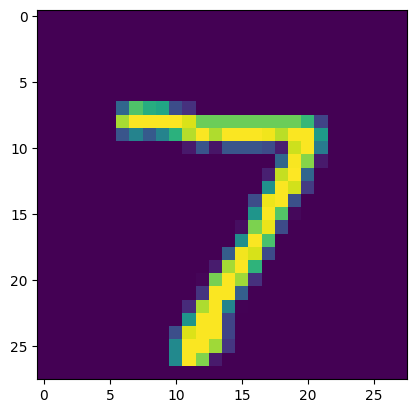

In [70]:
plt.imshow(X_test[0])
plt.show()

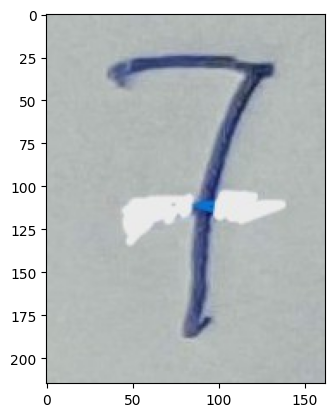

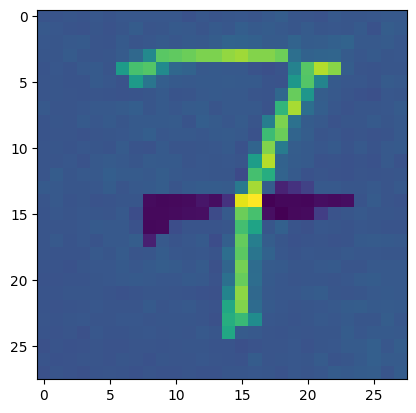

1/1 [==============================] - 0s 110ms/step
The digit is -> 1


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
import cv2

loaded_model = joblib.load("model.pkl")

image_path = "7.jpg"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

resized_image = cv2.resize(image, (28, 28), interpolation = cv2.INTER_LINEAR)
resized_image = cv2.bitwise_not(resized_image)
resized_image = resized_image[:, :, 0]
plt.imshow(resized_image)
plt.show()

temp = resized_image.reshape(1, 28, 28, 1)
temp = temp/255
result = loaded_model.predict(temp)
result = result.argmax(axis=1)
print("The digit is ->" , result[0])